In [308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sp

In [309]:
data = pd.read_csv('polarisation.csv')

In [310]:
#Error for data from 10 to 90 degrees for 1 degree increments
x = np.linspace(10,90,9)
analyser_error = [0.5/i for i in x]

rms0 = np.sqrt(np.mean(np.square(analyser_error)))

#Error for data from 10 to 180 degrees for 1 degree increments
x = np.linspace(10,180,18)
polariser_error = [0.5/i for i in x]

rms1 = np.sqrt(np.mean(np.square(polariser_error)))

#Error for data from 10 to 180 degrees for 0.5 degree increments
x = np.linspace(10,180,18)
spectrometer_error = [0.25/i for i in x]

rms2 = np.sqrt(np.mean(np.square(spectrometer_error)))

print(rms0,rms1,rms2)

0.02068122962150395 0.014864635328386198 0.007432317664193099


In [ ]:
def curve(theta,I_0,theta0,offset):
    return I_0 * np.cos(np.radians((theta - theta0)))**2 + offset

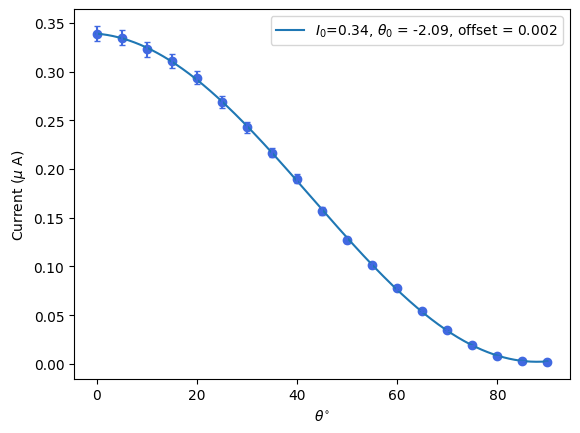

In [312]:
x = data['Angle (degrees)']
y = data['Current (micro amps)']

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}'
)

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms0**2+(0.5/287)**2+(0.5/45)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current ($\mu$ A)')


plt.legend()

plt.savefig("maluslaw.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [313]:
quarter_waveplate = pd.read_csv('exp3.csv')


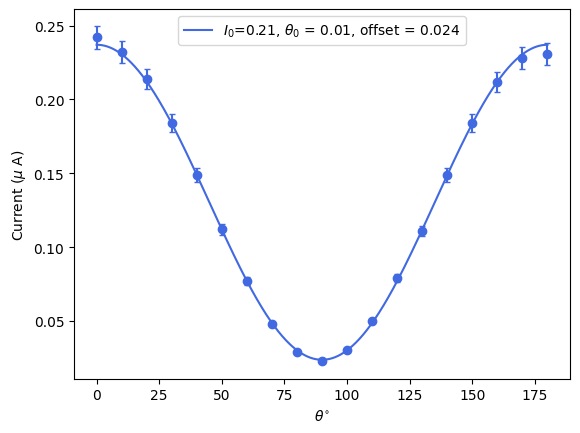

In [314]:
x = quarter_waveplate['Angle']
y = quarter_waveplate['Current']

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)

plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms1**2+(0.5/287)**2+(0.5/17.5)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current ($\mu$ A)')

plt.legend()
plt.savefig("quarter_waveplate.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()


In [315]:
circ = pd.read_csv('exp4.csv')

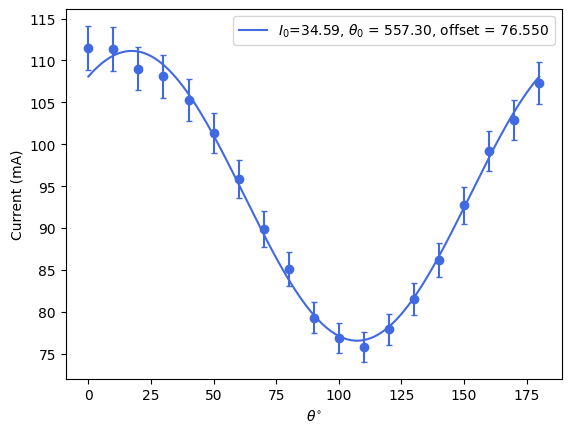

In [316]:
x = circ['Angle']
y = circ['Current']*10

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms0**2+(0.5/287)**2+(0.5/45)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current (mA)')

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')
plt.legend()
plt.savefig("circ.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [317]:
verticaldettol = pd.read_csv('exp1vd.csv')
horizontaldettol = pd.read_csv('exp1hd.csv')
exp3A = pd.read_csv('exp3a.csv')
exp3B = pd.read_csv('exp3b.csv')

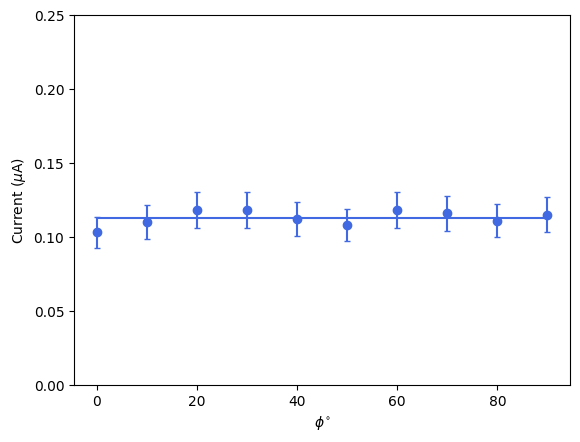

In [318]:
x = verticaldettol['Angle']
y = verticaldettol['Current (micro amps)']

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms0**2+(0.5/199)**2+(0.25/265)**2+0.1**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel(r'Current ($\mu$A)')

plt.plot(x,[y.mean()]*len(x),color='royalblue')

plt.ylim(0,0.25)
plt.savefig("verticaldettol.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

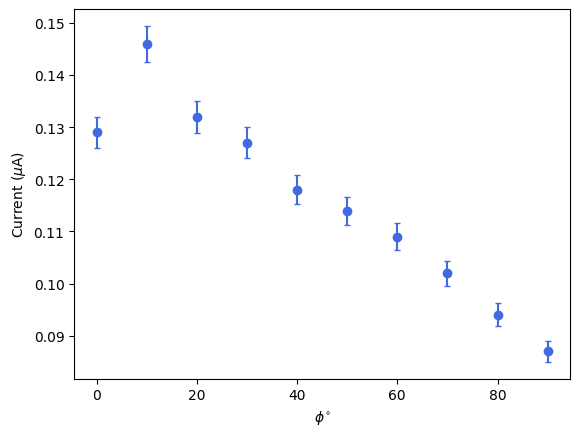

In [319]:
x = horizontaldettol['Angle']
y = horizontaldettol['Current (micro amps)']

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms0**2+(0.5/287)**2+(0.5/45)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel(r'Current ($\mu$A)')

plt.savefig("horizontaldettol.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

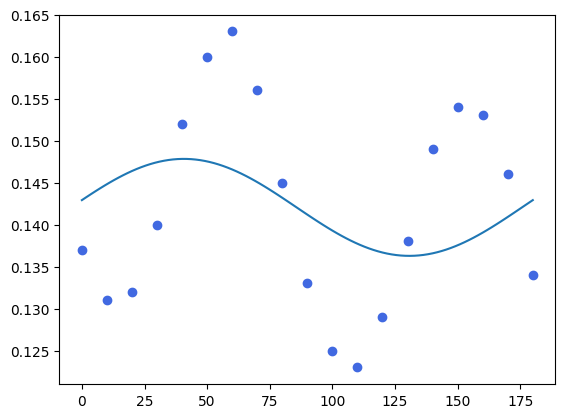

In [320]:
x = exp3A['Angle']
y = exp3A['Current (mA)']

plt.scatter(
    x,
    y,
    color='royalblue'
)

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),100)
y_smooth = curve(x_smooth,*param)
plt.plot(x_smooth,y_smooth)

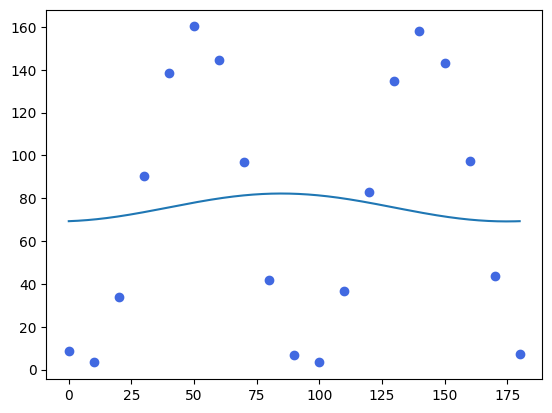

In [321]:
x = exp3B['Angle']
y = exp3B['Current (100 micro amps)']

plt.scatter(
    x,
    y,
    color='royalblue'
)

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(x_smooth,y_smooth)

In [322]:
exp4bv = pd.read_csv('exp4bv.csv')
exp4bh = pd.read_csv('exp4bh.csv')
exp520 = pd.read_csv('exp520.csv')
exp579 = pd.read_csv('exp579.csv')

Text(0, 0.5, 'Current (mA)')

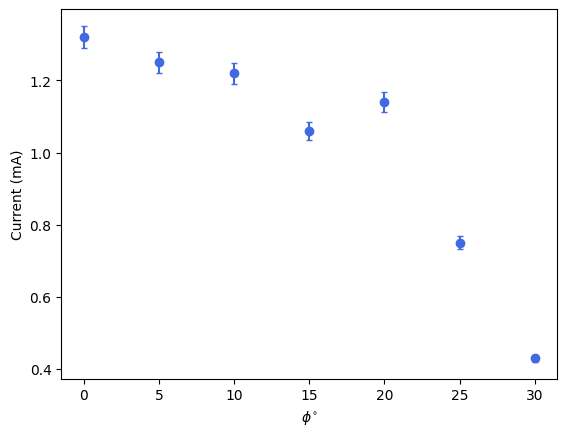

In [323]:
x=exp4bh['Angle']
y=exp4bh['Current (100 micro amps)']/10

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms0**2+(0.5/287)**2+(0.5/45)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel(r'Current (mA)')

Text(0, 0.5, 'Current (mA)')

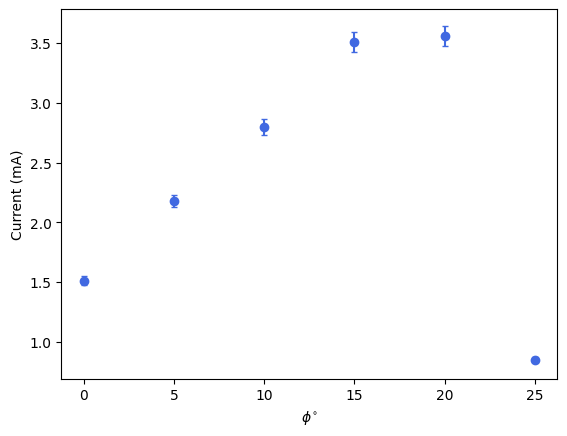

In [324]:
x=exp4bv['Angle']
y=exp4bv['Current (100 micro amps)']/10

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=np.sqrt(rms0**2+(0.5/287)**2+(0.5/45)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel(r'Current (mA)')

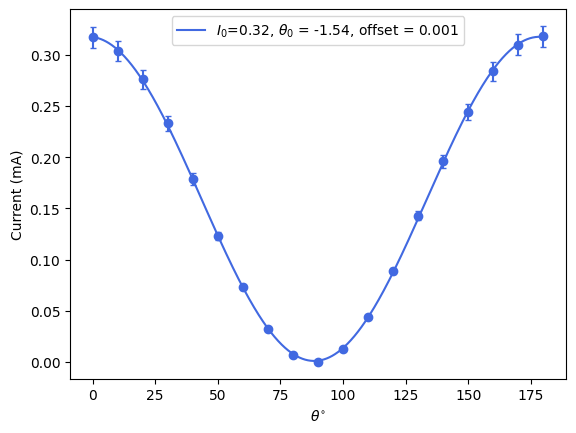

In [325]:
x = exp520['Angle']
y = exp520['Current(mA)']

plt.scatter(
    x,
    y,
    color='royalblue'
)

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.errorbar(x,y,yerr=np.sqrt(rms1**2+(0.5/287)**2+(0.5/17.5)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current (mA)')

plt.legend()

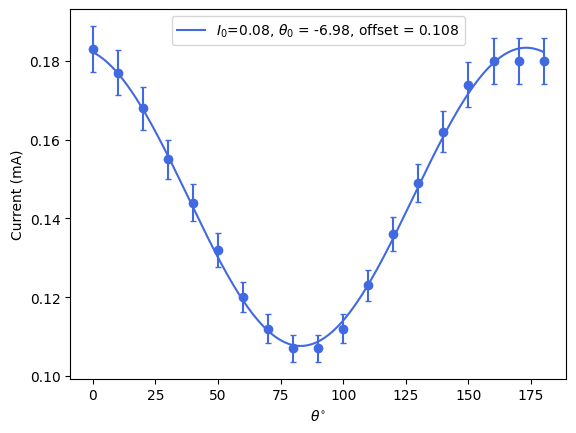

In [326]:
x = exp579['Angle']
y = exp579['Current(mA)']

plt.scatter(
    x,
    y,
    color='royalblue'
)

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.errorbar(x,y,yerr=np.sqrt(rms1**2+(0.5/287)**2+(0.5/17.5)**2)*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current (mA)')

plt.legend()